In [ ]:
# IMPORTING THE BASIC LIBRARIES

In [ ]:

import scipy
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, \
f1_score,roc_auc_score,roc_curve,precision_score,recall_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,6]
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)

In [ ]:
# IMPORTING THE DATASET


In [19]:
df=pd.read_csv('Spam.csv',encoding='latin1')
# df.drop([''],axis=1,inplace=True)

target='spam'
labels=['Ham','Spam']
features=[i for i in df.columns.values if i not in[target]]
original_df=df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m the dataset consists of{}features and {} samples.'.format(df.shape[1],df.shape[0]))



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,...,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Inference: the dataset consists of58features and 4601 samples.


In [20]:
# checking the dtypes of all thee columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [21]:
# checking number of unique rows in each feature
df.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [22]:
# checking number of unique rows in each feature

nu=df[features].nunique().sort_values()
nf=[];cf=[];nnf=0;ncf=0;

# numerical and categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else:nf.append(nu.index[i])

    print('\n\033[1mInference:\033[0m the dataset has{} numerical and {} categorica features.'.format(len(nf),len(cf)))




Inference: the dataset has1 numerical and 0 categorica features.

Inference: the dataset has2 numerical and 0 categorica features.

Inference: the dataset has3 numerical and 0 categorica features.

Inference: the dataset has4 numerical and 0 categorica features.

Inference: the dataset has5 numerical and 0 categorica features.

Inference: the dataset has6 numerical and 0 categorica features.

Inference: the dataset has7 numerical and 0 categorica features.

Inference: the dataset has8 numerical and 0 categorica features.

Inference: the dataset has9 numerical and 0 categorica features.

Inference: the dataset has10 numerical and 0 categorica features.

Inference: the dataset has11 numerical and 0 categorica features.

Inference: the dataset has12 numerical and 0 categorica features.

Inference: the dataset has13 numerical and 0 categorica features.

Inference: the dataset has14 numerical and 0 categorica features.

Inference: the dataset has15 numerical and 0 categorica features.

Inf

In [23]:
# checking the stats of all columns
display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,...,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,...,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
# EXPLORATRY DATA ANALYSIS(EDA)

    
Inference:Target Variable Distribution    


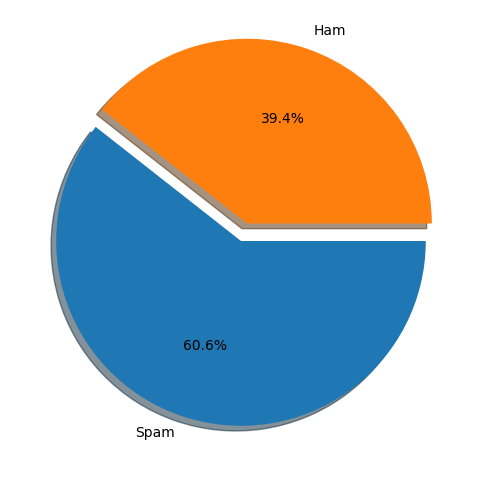

In [24]:
# let us first analyze the distribution of the target variable

MAP={}
for e,i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
# MAP={0:'Not-Survived',1:'Survived'}    
df1=df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\n\033[1mInference:\033[0mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(),labels=df1[target].value_counts().index,counterclock=False,shadow=True,
        explode=explode,autopct='%1.1f%%',radius=1,startangle=0)
plt.show()

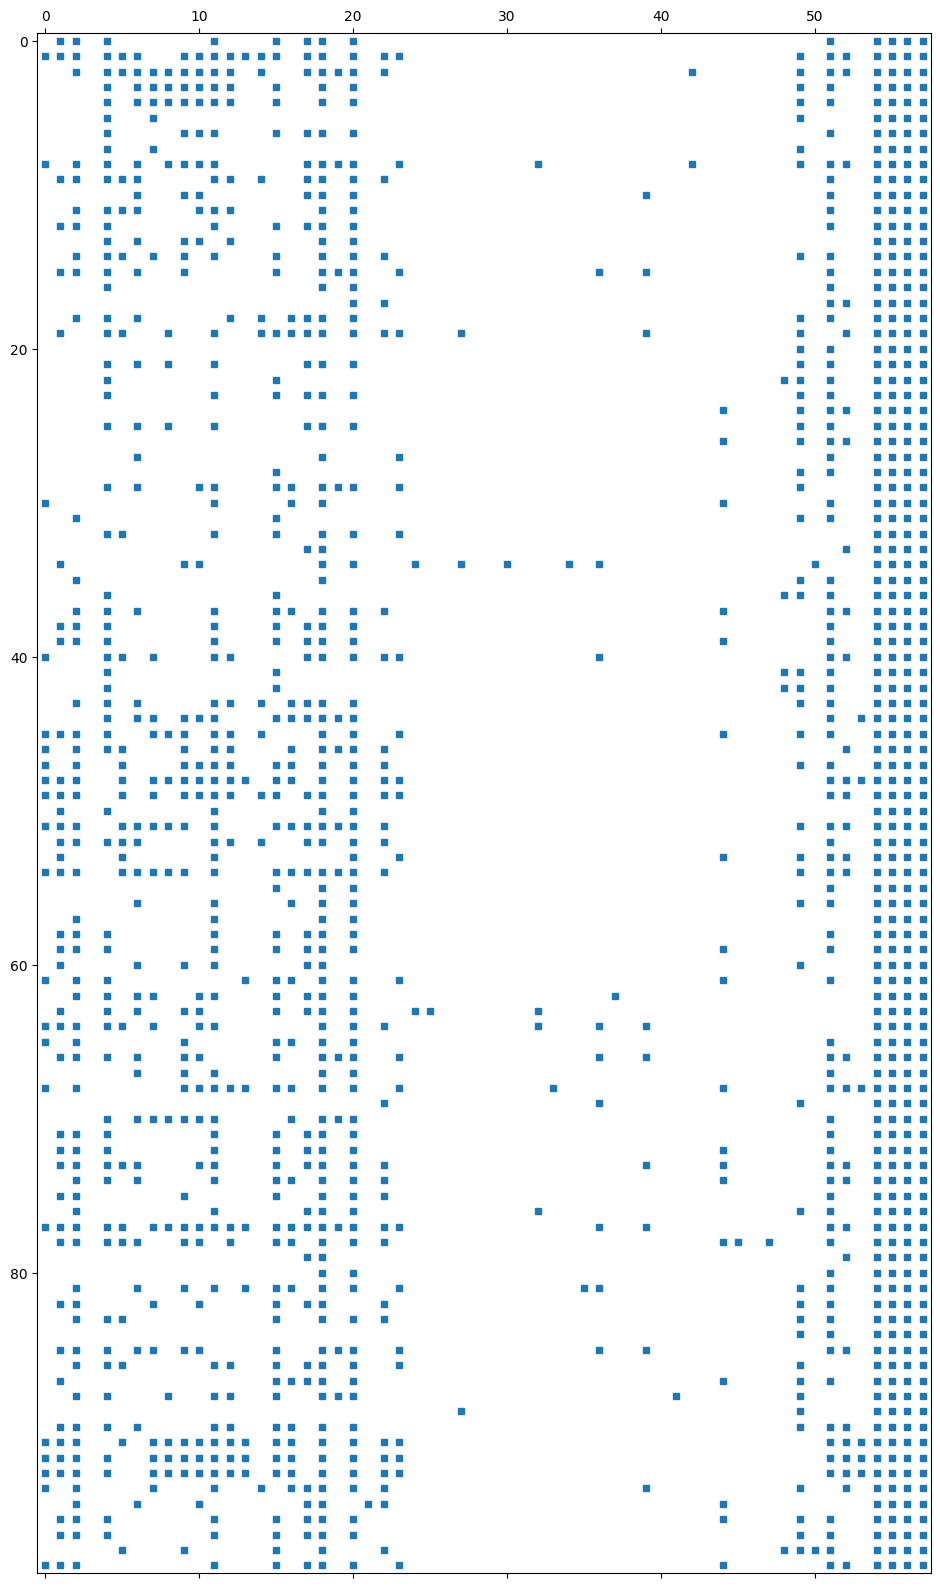

In [25]:
# Visualising the sparse matrix

plt.figure(figsize=[15,20])
plt.title('')
plt.spy(df[:100].values,precision=0.1,markersize=5)
plt.show()

In [ ]:
# DATA PREPROCESSING

In [26]:
# removal of any deplicate rows(if any)

counter=0
r,c=original_df.shape

df1=df.copy()
df1.drop_duplicates(inplace =True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m the dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped--->{r-df1.shape[0]}')


Inference: Number of duplicates dropped--->391


In [27]:
# check for empty elements

nvc=pd.DataFrame(df1.isnull().sum().sort_values(),columns=['Total Null Values'])
nvc['Percentage']=round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)
                        

                            Total Null Values  Percentage
word_freq_make                              0         0.0
word_freq_address                           0         0.0
word_freq_all                               0         0.0
word_freq_3d                                0         0.0
word_freq_our                               0         0.0
word_freq_over                              0         0.0
word_freq_remove                            0         0.0
word_freq_internet                          0         0.0
word_freq_order                             0         0.0
word_freq_mail                              0         0.0
word_freq_receive                           0         0.0
word_freq_will                              0         0.0
word_freq_people                            0         0.0
word_freq_report                            0         0.0
word_freq_addresses                         0         0.0
word_freq_free                              0         0.0
word_freq_busi

In [28]:
# fixing the imbalance using SMOTE technique


df5=df1.copy()
print('Original class distribution:')
print(df5[target].value_counts())
xf=df5.columns
X=df5.drop([target],axis=1)
Y=df5[target]
smote=SMOTE()
X,Y=smote.fit_resample(X,Y)

df5=pd.DataFrame(X,Y)
df5=pd.DataFrame(X,columns=xf)
df5[target]=Y

print('\nClass distribution after applying SMOTE technique:',)
print(Y.value_counts())

Original class distribution:
spam
0    2531
1    1679
Name: count, dtype: int64

Class distribution after applying SMOTE technique:
spam
1    2531
0    2531
Name: count, dtype: int64


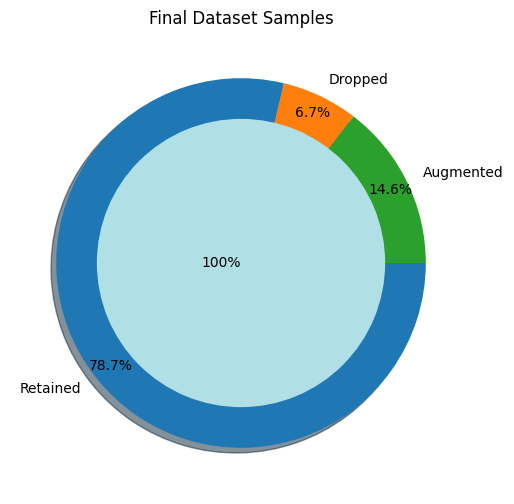


Inference:The final dataset after cleanup has 58 samples and 4601 rows.


In [29]:
# final dataset size after performing preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0],original_df.shape[0]-df1.shape[0],df5.shape[0]-df1.shape[0]],radius=1,shadow=True,
        labels=['Retained','Dropped','Augmented'],
counterclock=False,autopct='%1.1f%%',pctdistance=0.9,explode=[0,0,0])
plt.pie([df.shape[0]],labels=['100%'],labeldistance=-0,radius=0.78,shadow=True,colors=['powderblue'])
plt.show()
print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples and {} rows.'.format(df.shape[1],df.shape[0]))

# DATA MANIPULATION

In [30]:
df=df5.copy()
df.columns=[i.replace('[','_')for i in df.columns]

X=df.drop([target],axis=1)
Y=df[target]
Train_X,Test_X,Train_Y,Test_Y=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=0)

print('Original set --->',X.shape,'\nTraining set --->',X.shape,Y.shape,'\nTraining set --->',Test_X.shape,Train_Y.shape,'\nTesting set --->',Test_X.shape,'',Train_Y.shape)

Original set ---> (5062, 57) 
Training set ---> (5062, 57) (5062,) 
Training set ---> (1013, 57) (4049,) 
Testing set ---> (1013, 57)  (4049,)


In [33]:
# feature sacling (standardization)

std=StandardScaler()

print('\033[1mStandardardization of Training set'.center(100))
Train_X_std=std.fit_transform(Train_X)
Train_X_std=pd.DataFrame(Train_X_std,columns=X.columns)
display(Train_X_std.describe())
print('\n','\033[1mStandardardization of Testing set'.center(100))
Test_X_std=std.transform(Test_X)
Test_X_std=pd.DataFrame(Test_X_std,columns=X.columns)
display(Test_X_std.describe())

                               Standardardization of Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,-3.685206e-17,-1.930346e-17,-1.175756e-16,1.754860e-17,-7.984612e-17,1.754860e-17,2.281318e-17,2.237446e-17,-6.843953e-17,-4.387150e-17,-2.632290e-18,-3.860692e-17,7.019439e-18,-9.213014e-18,1.403888e-17,-1.842603e-17,5.264579e-18,-7.019439e-18,-8.686556e-17,-3.509720e-18,-2.544547e-17,7.019439e-18,-1.017819e-16,-7.019439e-18,1.798731e-17,...,2.193575e-17,-3.114876e-17,-1.140659e-17,-7.019439e-17,1.403888e-17,-1.228402e-17,3.948435e-18,7.019439e-18,-3.509720e-17,-1.754860e-17,-1.052916e-17,-3.158748e-17,-1.052916e-17,-8.774299e-18,-2.544547e-17,3.071005e-18,3.948435e-18,9.081400e-17,-2.939390e-17,3.948435e-17,2.061960e-17,7.019439e-18,3.509720e-18,-5.264579e-18,-3.158748e-17
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.812007e-01,-3.046936e-01,-6.160105e-01,-5.575175e-02,-5.173846e-01,-3.827848e-01,-3.494658e-01,-2.966246e-01,-3.593865e-01,-4.064781e-01,-3.500731e-01,-6.661151e-01,-3.292339e-01,-1.914508e-01,-2.072845e-01,-3.804193e-01,-3.644042e-01,-3.862889e-01,-1.061017e+00,-2.232073e-01,-7.946815e-01,-1.344716e-01,-3.425021e-01,-2.772096e-01,-3.202422e-01,...,-1.686572e-01,-1.368622e-01,-1.824889e-01,-2.527910e-01,-3.183525e-01,-5.674351e-02,-1.702803e-01,-1.900461e-01,-1.194527e-01,-1.584970e-01,-1.933354e-01,-1.208490e-01,-2.861663e-01,-1.920826e-01,-7.260272e-02,-1.074016e-01,-1.638623e-01,-5.108904e-01,-1.889712e-01,-3.744012e-01,-3.675944e-01,-1.208890e-01,-1.411175e-01,-2.797250e-01,-4.952414e-01
25%,-3.812007e-01,-3.046936e-01,-6.160105e-01,-5.575175e-02,-5.173846e-01,-3.827848e-01,-3.494658e-01,-2.966246e-01,-3.593865e-01,-4.064781e-01,-3.500731e-01,-6.661151e-01,-3.292339e-01,-1.914508e-01,-2.072845e-01,-3.804193e-01,-3.644042e-01,-3.862889e-01,-9.614231e-01,-2.232073e-01,-7.946815e-01,-1.344716e-01,-3.425021e-01,-2.772096e-01,-3.202422e-01,...,-1.686572e-01,-1.368622e-01,-1.824889e-01,-2.527910e-01,-3.183525e-01,-5.674351e-02,-1.702803e-01,-1.900461e-01,-1.


                                Standardardization of Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.018189,0.075029,0.014921,-0.036342,-0.007300,-0.017584,-0.015603,-0.020585,-0.051270,0.019074,-0.045700,0.005823,0.030837,-0.008716,0.026450,0.021667,-0.037565,0.009046,0.006695,-0.002324,0.022679,-0.016870,-0.016981,0.080472,0.049820,...,-0.061202,0.011623,-0.014706,0.021304,0.001561,0.025525,0.007766,0.011114,-0.043609,-0.006901,0.022758,0.016047,0.024224,0.050372,-0.057007,-0.042023,0.004572,-0.035271,-0.015616,-0.040789,-0.016056,0.061668,0.020088,0.006187,-0.005873
std,1.040852,1.592681,1.018320,0.253389,0.879649,0.833423,0.963858,0.826919,0.832968,0.941926,0.897315,0.963106,0.898064,1.033054,1.082475,1.203965,0.898785,1.045921,1.022537,1.430984,1.070519,0.910041,1.053062,1.658814,1.275003,...,0.598527,1.034535,0.772310,1.229529,1.058337,1.239054,0.859670,1.004621,0.597792,0.821376,1.051262,1.103626,0.849077,1.339134,0.211484,0.569260,1.096257,0.689046,1.550936,0.610781,0.821185,1.482629,1.019111,0.688847,1.069154
min,-0.381201,-0.304694,-0.616011,-0.055752,-0.517385,-0.382785,-0.349466,-0.296625,-0.359387,-0.406478,-0.350073,-0.666115,-0.329234,-0.191451,-0.207285,-0.380419,-0.364404,-0.386289,-1.061017,-0.223207,-0.794682,-0.134472,-0.342502,-0.277210,-0.320242,...,-0.168657,-0.136862,-0.182489,-0.252791,-0.318352,-0.056744,-0.170280,-0.190046,-0.119453,-0.158497,-0.193335,-0.120849,-0.286166,-0.192083,-0.072603,-0.107402,-0.163862,-0.510890,-0.188971,-0.374401,-0.367594,-0.120889,-0.141117,-0.279725,-0.495241
25%,-0.381201,-0.304694,-0.616011,-0.055752,-0.517385,-0.382785,-0.349466,-0.296625,-0.359387,-0.406478,-0.350073,-0.666115,-0.329234,-0.191451,-0.207285,-0.380419,-0.364404,-0.386289,-0.978999,-0.223207,-0.794682,-0.134472,-0.342502,-0.277210,-0.320242,...,-0.168657,-0.136862,-0.182489,-0.252791,-0.318352,-0.056744,-0.170280,-0.190046,-0.119453,-0.158497,-0.193335,-0.120849,-0.286166,-0.192083,-0.072603,-0.107402,-0.163862,-0.510890,-0.188971,-0.374401,-0.367594,-0.120889,-0.119988,-0.250574,-0.431861
50%,-0.381201,-0.304694,-0.616011,-0.055752,-0.517385,-0.382785,-0.349466,-0.296625,-0.359387,-0.406478,-0.350073,-0.297779,-0.329234,-0.191451,-0.207285,-0.380419,-0.364404,-0.386289,-0.106085,-0.223207,-0.333948,-0.134472,-0.342502,-0.277210,-0.320242,...,-0.168657,-0.136862,-0.182489,-0.252791,-0.318352,-0.056744,-0.170280,-0.190046,-0.119453,-0.158497,-0.193335,-0.120849,-0.286166,-0.192083,-0.072603,-0.107402,-0.163862,-0.258659,-0.188971,-0.272463,-0.367594,-0.120889,-0.097975,-0.206848,-0.328289
75%,-0.173359,-0.269284,0.386010,-0.055752,0.230094,-0.103055,-0.349466,-0.296625,-0.359387,0.068772,-0.350073,0.3

In [ ]:
# FEATURE SELECTION/EXTRACTION

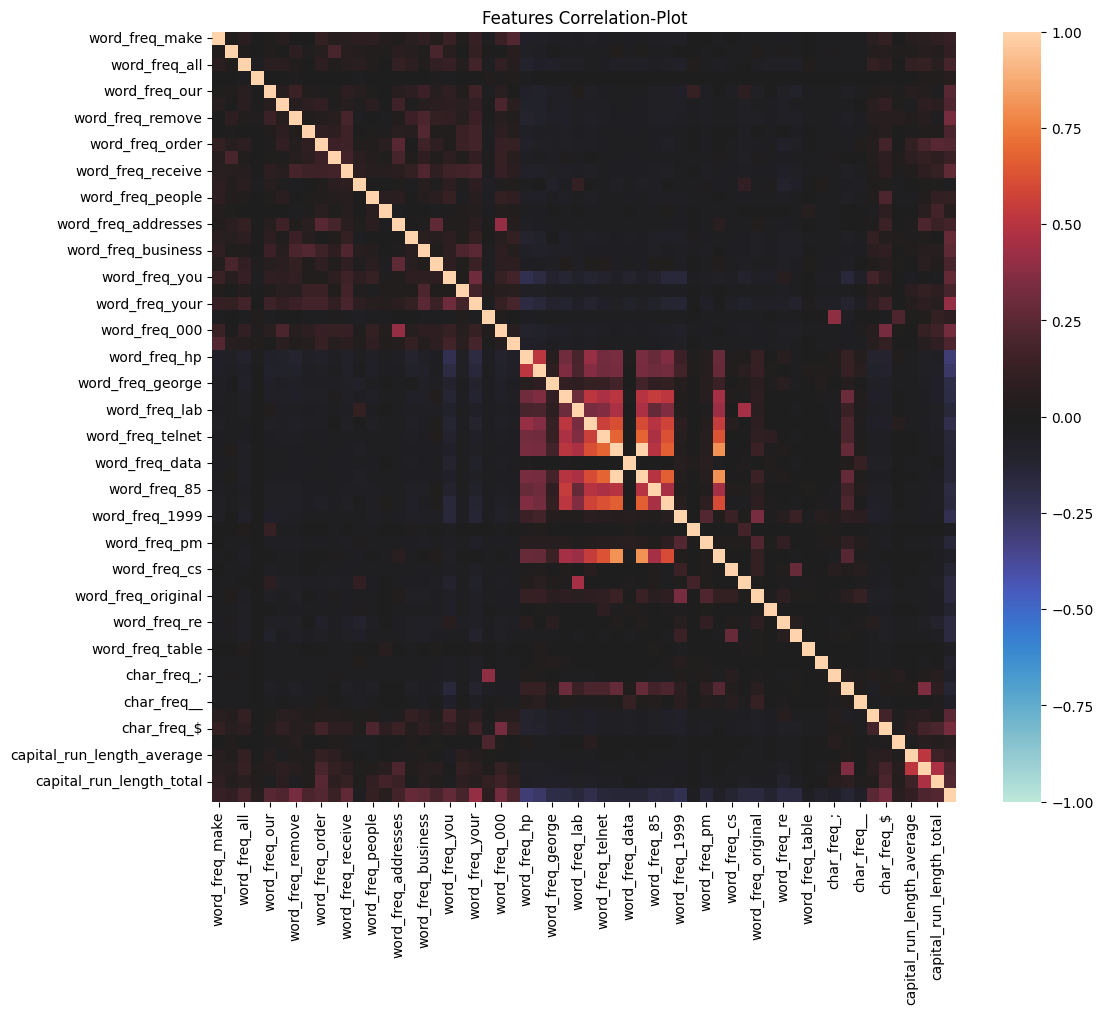

In [34]:
# checking the correlation

features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(),vmin=-1,vmax=1,center=0)
plt.show()

In [ ]:
# TRAIN AND EVALUATE MODELS

In [ ]:
# LOGISTIC REGRESSION

In [47]:
lr=LogisticRegression(max_iter=1000,random_state=42)
lr.fit(Train_X_std,Train_Y)




,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [58]:
# MAKE PREDICTIONS

Y_pred_proba=lr.predict_proba(Test_X_std)
Y_pred_positive_proba=Y_pred_proba[:,1]
Y_pred_lr=(Y_pred_positive_proba>0.5).astype(int)


print("Logistic Regression")
print("Accuracy:",accuracy_score(Test_Y,Y_pred_lr))
print("F1-score:",f1_score(Test_Y,Y_pred_lr))
print(classification_report(Test_Y,Y_pred_lr))

Logistic Regression
Accuracy: 0.932872655478776
F1-score: 0.9313131313131313
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       513
           1       0.94      0.92      0.93       500

    accuracy                           0.93      1013
   macro avg       0.93      0.93      0.93      1013
weighted avg       0.93      0.93      0.93      1013



In [ ]:
# NAIVE BAYES

In [59]:
nb=BernoulliNB()
nb.fit(Train_X_std,Train_Y)
Y_pred_nb=nb.predict(Test_X_std)
print("Naive Bayes")
print("Accuracy:",accuracy_score(Test_Y,Y_pred_nb))
print("F1-score:",f1_score(Test_Y,Y_pred_nb))
print(classification_report(Test_Y,Y_pred_nb))

Naive Bayes
Accuracy: 0.9190523198420533
F1-score: 0.9140461215932913
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       513
           1       0.96      0.87      0.91       500

    accuracy                           0.92      1013
   macro avg       0.92      0.92      0.92      1013
weighted avg       0.92      0.92      0.92      1013



In [ ]:
# RANDOM FOREST

In [60]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(Train_X_std,Train_Y)
# MAKE PREDICTIONS
Y_pred_rf=rf.predict(Test_X_std)
# EVALUATION
print("Random Forest")
print("Accuracy:",accuracy_score(Test_Y,Y_pred_rf))
print("F1-score:",f1_score(Test_Y,Y_pred_rf))
print(classification_report(Test_Y,Y_pred_rf))

Random Forest
Accuracy: 0.9634748272458046
F1-score: 0.9625884732052579
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       513
           1       0.97      0.95      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



In [ ]:
# Support vector machine

In [61]:
svm=SVC(probability=True,random_state=42)
svm.fit(Train_X_std,Train_Y)
# MAKE PREDICTIONS
Y_pred_svm=svm.predict(Test_X_std)
# EVALUATION
print("Support Vector Machine")
print("Accuracy:",accuracy_score(Test_Y,Y_pred_svm))
print("F1-score:",f1_score(Test_Y,Y_pred_svm))
print(classification_report(Test_Y,Y_pred_svm))

Support Vector Machine
Accuracy: 0.9358341559723593
F1-score: 0.9337410805300713
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       513
           1       0.95      0.92      0.93       500

    accuracy                           0.94      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.94      0.94      0.94      1013



In [ ]:
# Evaluating all models

In [63]:
models={"Logistic Regression":lr,
        "Naive Bayes":nb,
        "Random Forest":rf,
        "SVM":svm}
# store evaluatioon results

results=[]
for name,model in models.items():
    Y_pred=model.predict(Test_X_std)
    f1=f1_score(Test_Y,Y_pred)
    accuracy=accuracy_score(Test_Y,Y_pred)
    auc=roc_auc_score(Test_Y,model.predict_proba(Test_X_std)[:,1])
    results.append([name,accuracy,f1,auc])
# diaplay results in a DataFrame
results_df=pd.DataFrame(results,columns=["Model","Accuracy","F1-score","AUC-ROC"])
print(results_df)


                 Model  Accuracy  F1-score   AUC-ROC
0  Logistic Regression  0.932873  0.931313  0.974756
1          Naive Bayes  0.919052  0.914046  0.976306
2        Random Forest  0.963475  0.962588  0.990090
3                  SVM  0.935834  0.933741  0.983201


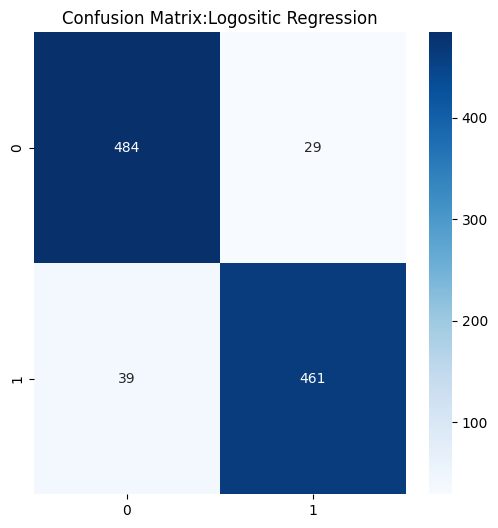

In [64]:
# confuusion matrix for Logistic regression

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(Test_Y,Y_pred_lr),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix:Logositic Regression")
plt.show()